# LA Economics Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import dexplot as dxp

In [4]:
econ = pd.read_excel(r'LAEconomics.xlsx')

In [6]:
econ.tail()

,DATE,Unempl. Rate,HH Income,Month,Population
217,2020-02-01,4.6,73201.56,2,10018.40462
218,2020-03-01,6.6,73574.10,3,10015.50470
219,2020-04-01,20.4,73946.64,4,10012.60478
220,2020-05-01,20.8,74319.18,5,10009.70486
221,2020-06-01,19.5,74691.72,6,10006.80494


In [50]:
dates = (econ['DATE'] > '2011-12-01') & (econ['DATE'] < '2020-06-01')

In [52]:
econ[dates].sample(n=10,random_state=1)

,DATE,Unempl. Rate,HH Income,Month,Population,year
214,2019-11-01,4.1,72083.9400,11,10027.104380,2019
198,2018-07-01,5.1,67132.1140,7,10071.422250,2018
137,2013-06-01,10.2,54443.0004,6,9992.484200,2013
220,2020-05-01,20.8,74319.1800,5,10009.704860,2020
156,2015-01-01,7.8,57645.4169,1,10066.522669,2015
205,2019-02-01,4.6,68731.0800,2,10053.203660,2019
175,2016-08-01,5.6,61908.6663,8,10105.375160,2016
203,2018-12-01,4.5,67986.0040,12,10059.003500,2018
202,2018-11-01,4.4,67815.2260,11,10061.487250,2018
172,2016-05-01,4.8,61119.4163,5,10104.014800,2016


In [13]:
econ['year'] = pd.to_datetime(econ['DATE']).dt.year

Text(0.5, 1.0, 'Monthly Unemployment Rate View')

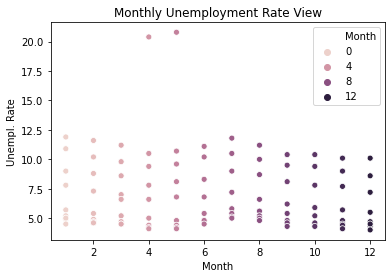

In [53]:
sns.scatterplot(x='Month', y='Unempl. Rate', hue='Month', data=econ[dates])
plt.title("Monthly Unemployment Rate View", size=12)
##ax.set_xlim(data['Dates'].min(), data['Dates'].max())

Text(0.5, 1.0, 'Yearly Unemployment Rate')

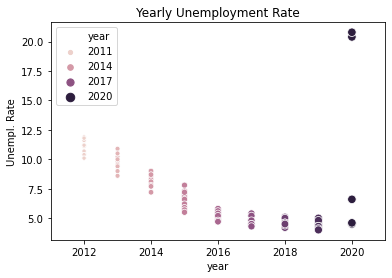

In [57]:
ax = sns.scatterplot(x='year', y='Unempl. Rate', hue='year', data=econ[dates],size='year')
ax.set_xlim(2011,2021) 

plt.title("Yearly Unemployment Rate", size=12)


Text(0.5, 1.0, 'Yearly HH Income')

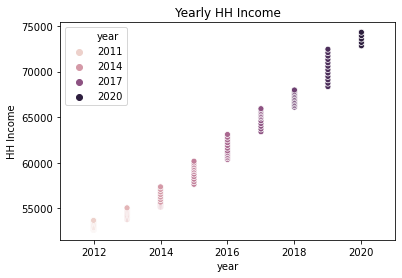

In [59]:
ax = sns.scatterplot(x='year', y='HH Income', hue='year',data=econ[dates])
ax.set_xlim(2011,2021)
plt.title("Yearly HH Income", size=12)

Text(0.5, 1.0, 'Yearly Population Rate')

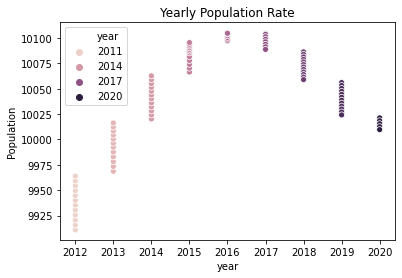

In [60]:
sns.scatterplot(x='year', y='Population', hue='year',data=econ[dates])
plt.title("Yearly Population Rate", size=12)

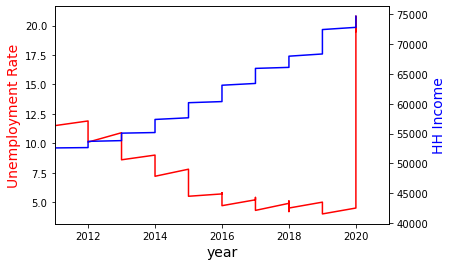

In [66]:
fig,ax = plt.subplots()
ax.plot(econ['year'], econ['Unempl. Rate'], color="red")
ax.set_xlabel("year",fontsize=14)
ax.set_xlim(2011,2021)
ax.set_ylabel("Unemployment Rate",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(econ['year'], econ['HH Income'],color="blue")
ax2.set_ylabel('HH Income',color="blue",fontsize=14)
plt.show()

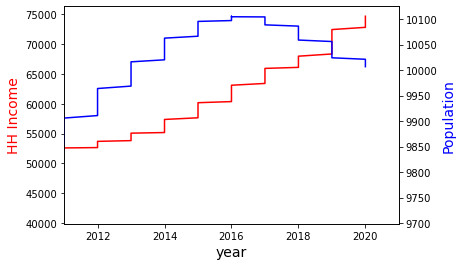

In [75]:
fig,ax = plt.subplots()
ax.plot(econ['year'], econ['HH Income'], color="red")
ax.set_xlabel("year",fontsize=14)
ax.set_xlim(2011,2021)
ax.set_ylabel("HH Income",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(econ['year'], econ['Population'],color="blue")
ax2.set_ylabel('Population',color="blue",fontsize=14)
plt.show()
# save as jpg
##fig.savefig('HH Income vs Population.jpg')

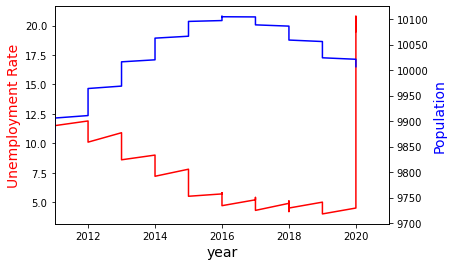

In [74]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(econ['year'], econ['Unempl. Rate'], color="red")
ax.set_xlabel("year",fontsize=14)
ax.set_xlim(2011,2021)
ax.set_ylabel("Unemployment Rate",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(econ['year'], econ['Population'],color="blue")
ax2.set_ylabel('Population',color="blue",fontsize=14)
plt.show()

# LA Police Budget

In [67]:
budget = pd.read_csv(r'LAPoliceBudgets.csv')

In [68]:
budget.head()

,FISCAL YEAR,Month,FUND,ACCOUNT GROUP NAME,EXPENDITURE
0,2020,12,100,SALARIES AND BENEFITS,83823918.13
1,2019,12,100,SALARIES AND BENEFITS,78131257.04
2,2018,1,100,SALARIES AND BENEFITS,75491264.10
3,2015,3,100,SALARIES AND BENEFITS,71958003.41
4,2013,4,100,SALARIES AND BENEFITS,71080353.88


In [73]:
import numpy as np
budget['ACCOUNT GROUP NAME'].unique()

array(['SALARIES AND BENEFITS', 'NOT DEF', 'EXPENSES', 'EQUIPMENT',
       'SPECIAL'], dtype=object)

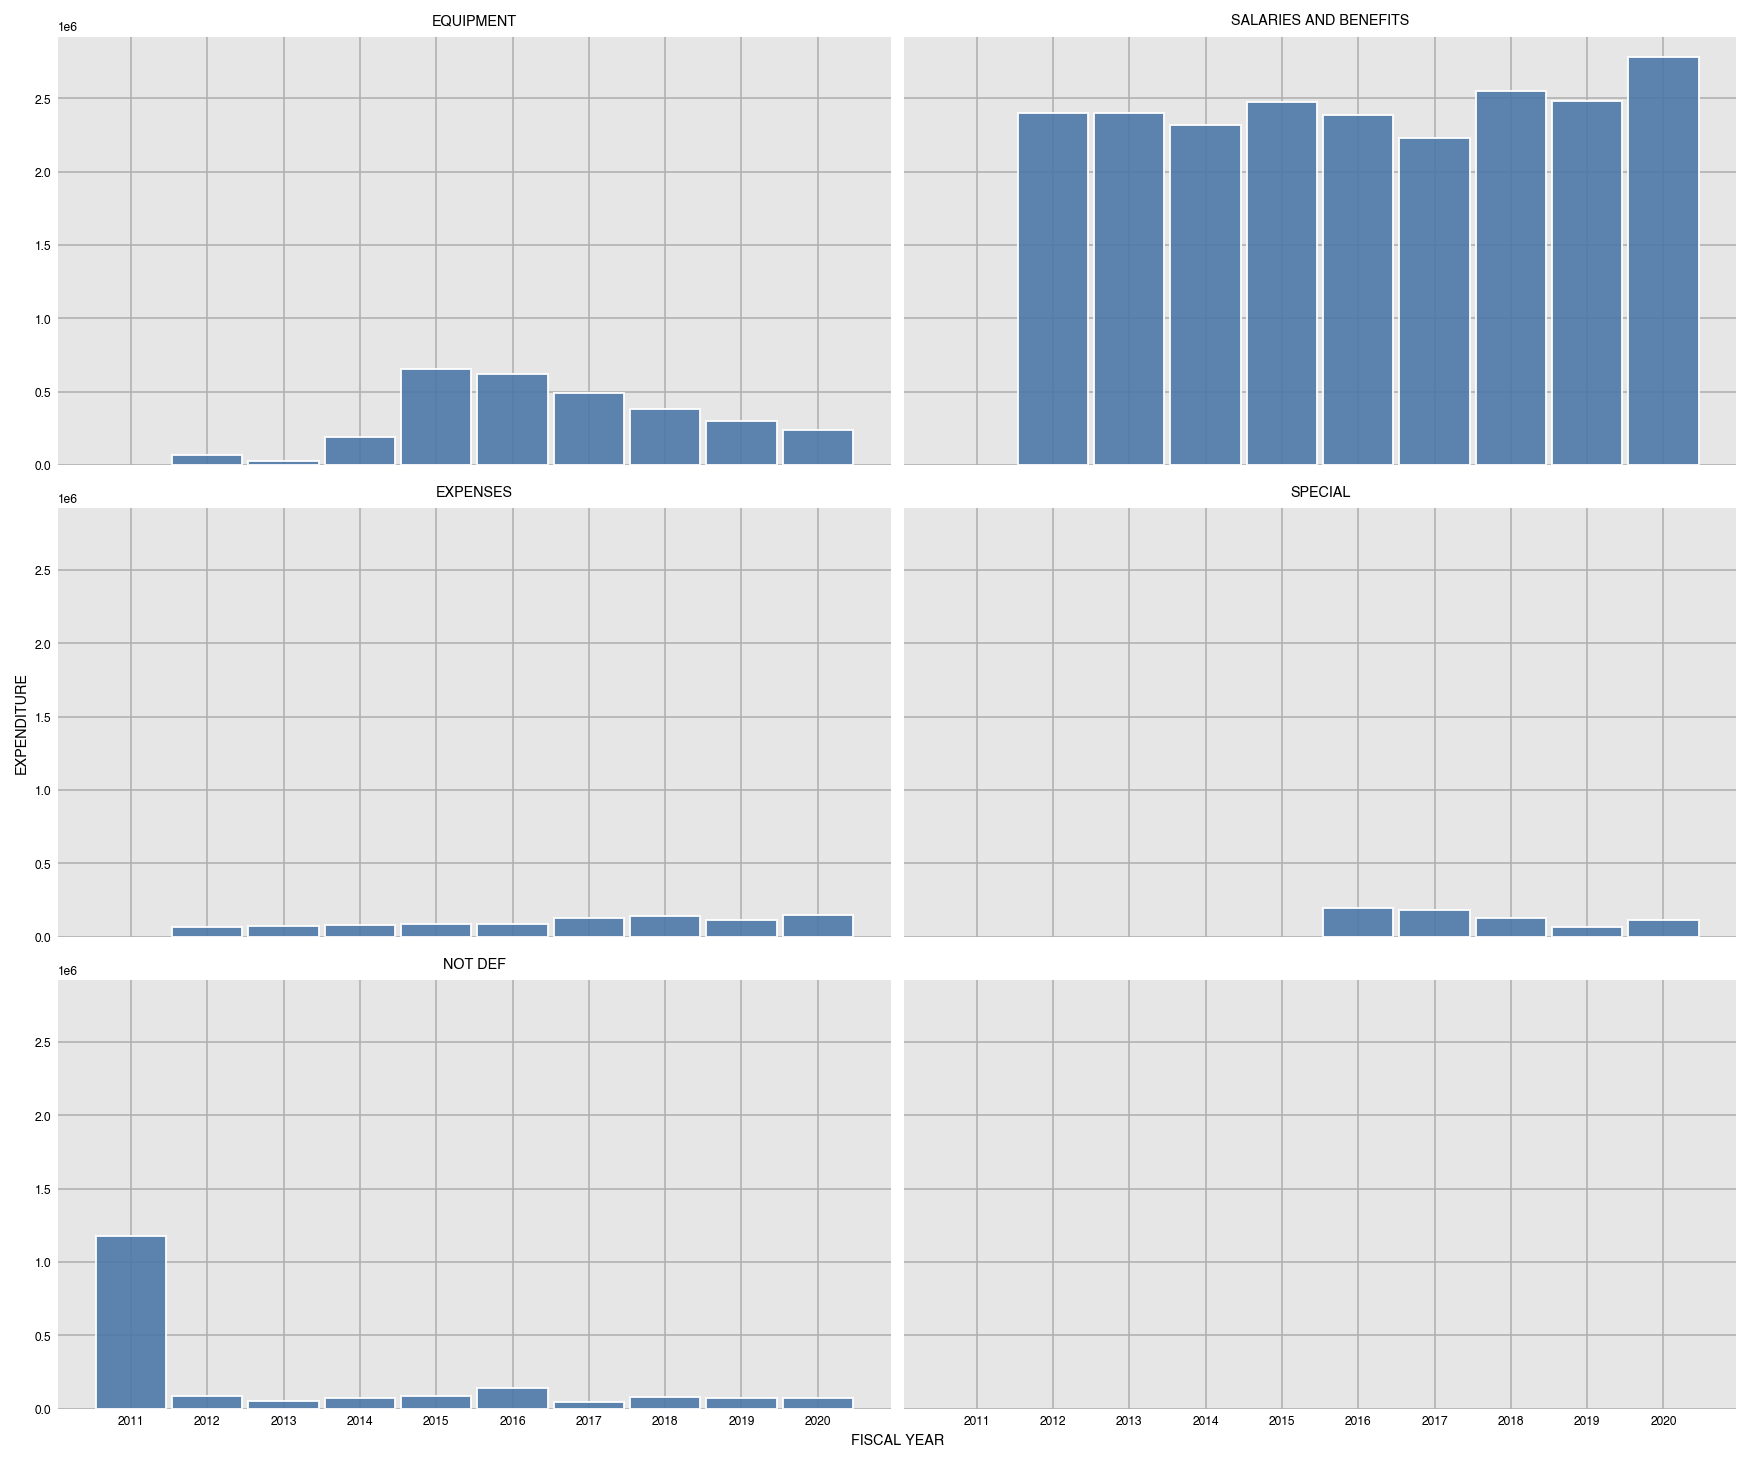

In [252]:
#filters for each group
dxp.bar(x='FISCAL YEAR', y='EXPENDITURE', data=budget,aggfunc='mean',
        col='ACCOUNT GROUP NAME',figsize=(12,10),wrap=2) ##, x_order= 'top 5'

In [115]:
##filter on salaries 
sal = budget['ACCOUNT GROUP NAME'] == 'SALARIES AND BENEFITS'
budget[sal].sample(n=10)

,FISCAL YEAR,Month,FUND,ACCOUNT GROUP NAME,EXPENDITURE
4599,2016,6,100,SALARIES AND BENEFITS,84476.96
1493,2019,9,100,SALARIES AND BENEFITS,1046794.80
3339,2019,11,100,SALARIES AND BENEFITS,207709.62
195,2013,5,100,SALARIES AND BENEFITS,12372748.70
710,2016,5,100,SALARIES AND BENEFITS,3378373.12
6035,2014,7,100,SALARIES AND BENEFITS,36976.44
1323,2019,7,100,SALARIES AND BENEFITS,1298932.42
2693,2016,4,100,SALARIES AND BENEFITS,374024.80
3855,2018,2,100,SALARIES AND BENEFITS,139786.15
325,2020,10,100,SALARIES AND BENEFITS,6327318.22


In [286]:
gb = budget.groupby(by=['FISCAL YEAR','EXPENDITURE']).sum()

In [287]:
df3 =pd.DataFrame(gb)
df3.reset_index(inplace=True)
df3.drop('Month',inplace=True,axis=1)

In [280]:
##df3.drop('Month',axis=1,inplace)

,FISCAL YEAR,EXPENDITURE
0,2011,112.00
1,2011,139.40
2,2011,358.87
3,2011,365.73
4,2011,428.02
...,...,...
13904,2020,55949451.77
13905,2020,55970278.78
13906,2020,56203356.04
13907,2020,58230080.94


In [302]:
df4df4.EXPENDITURE.astype(int)

0     678116206
1    1275151632
2    1271875237
3    1341836730
4    1455090201
5    1491202790
6     658772372
7    1323918252
8    1533650591
9    1028195523
Name: EXPENDITURE, dtype: int64

In [291]:
df4 = pd.DataFrame(df3.groupby('FISCAL YEAR').sum())
df4.reset_index(inplace=True)

In [305]:
df4['EXPENDITURE'] = df4.EXPENDITURE.astype(int)

In [312]:
df4

,FISCAL YEAR,EXPENDITURE
0,2011,678116206
1,2012,1275151632
2,2013,1271875237
3,2014,1341836730
4,2015,1455090201
5,2016,1491202790
6,2017,658772372
7,2018,1323918252
8,2019,1533650591
9,2020,1028195523


# LA Police Expense

In [97]:
expenses = pd.read_csv(r'LAPoliceExpensesz.csv')

In [101]:
expenses.sample(n=12,random_state=0)

,FISCAL YEAR,CALENDAR MONTH NUMBER,GOVERNMENT ACTIVITY,ACCOUNT NAME,EXPENDITURE TYPE,VALUE OF SPEND
158757,2019,5,PROTECTION OF PERSONS AND PROPERTY,FIELD EQUIPMENT EXPENSE,SUPPLIES & OTHER SERVICES,72.16
75455,2015,9,PROTECTION OF PERSONS AND PROPERTY,FIELD EQUIPMENT EXPENSE,COMMODITIES PURCHASES,6413.00
178752,2020,8,PROTECTION OF PERSONS AND PROPERTY,OFFICE AND ADMINISTRATIVE,SUPPLIES & OTHER SERVICES,29974.03
63225,2015,8,PROTECTION OF PERSONS AND PROPERTY,FIREARMS AMMUNITION OTHER DEVI,COMMODITIES PURCHASES,69.96
9197,2012,8,PROTECTION OF PERSONS AND PROPERTY,FIELD EQUIPMENT EXPENSE,COMMODITIES PURCHASES,2304.00
142780,2019,9,PROTECTION OF PERSONS AND PROPERTY,UNIFORMS,SUPPLIES & OTHER SERVICES,117.71
51046,2014,11,PROTECTION OF PERSONS AND PROPERTY,FIELD EQUIPMENT EXPENSE,COMMODITIES PURCHASES,52.70
41001,2014,4,PROTECTION OF PERSONS AND PROPERTY,OPERATING SUPPLIES,COMMODITIES PURCHASES,990.00
128296,2018,6,PROTECTION OF PERSONS AND PROPERTY,FIELD EQUIPMENT EXPENSE,SUPPLIES & OTHER SERVICES,51.92
144958,2019,10,PROTECTION OF PERSONS AND PROPERTY,FIELD EQUIPMENT EXPENSE,SUPPLIES & OTHER SERVICES,215.26


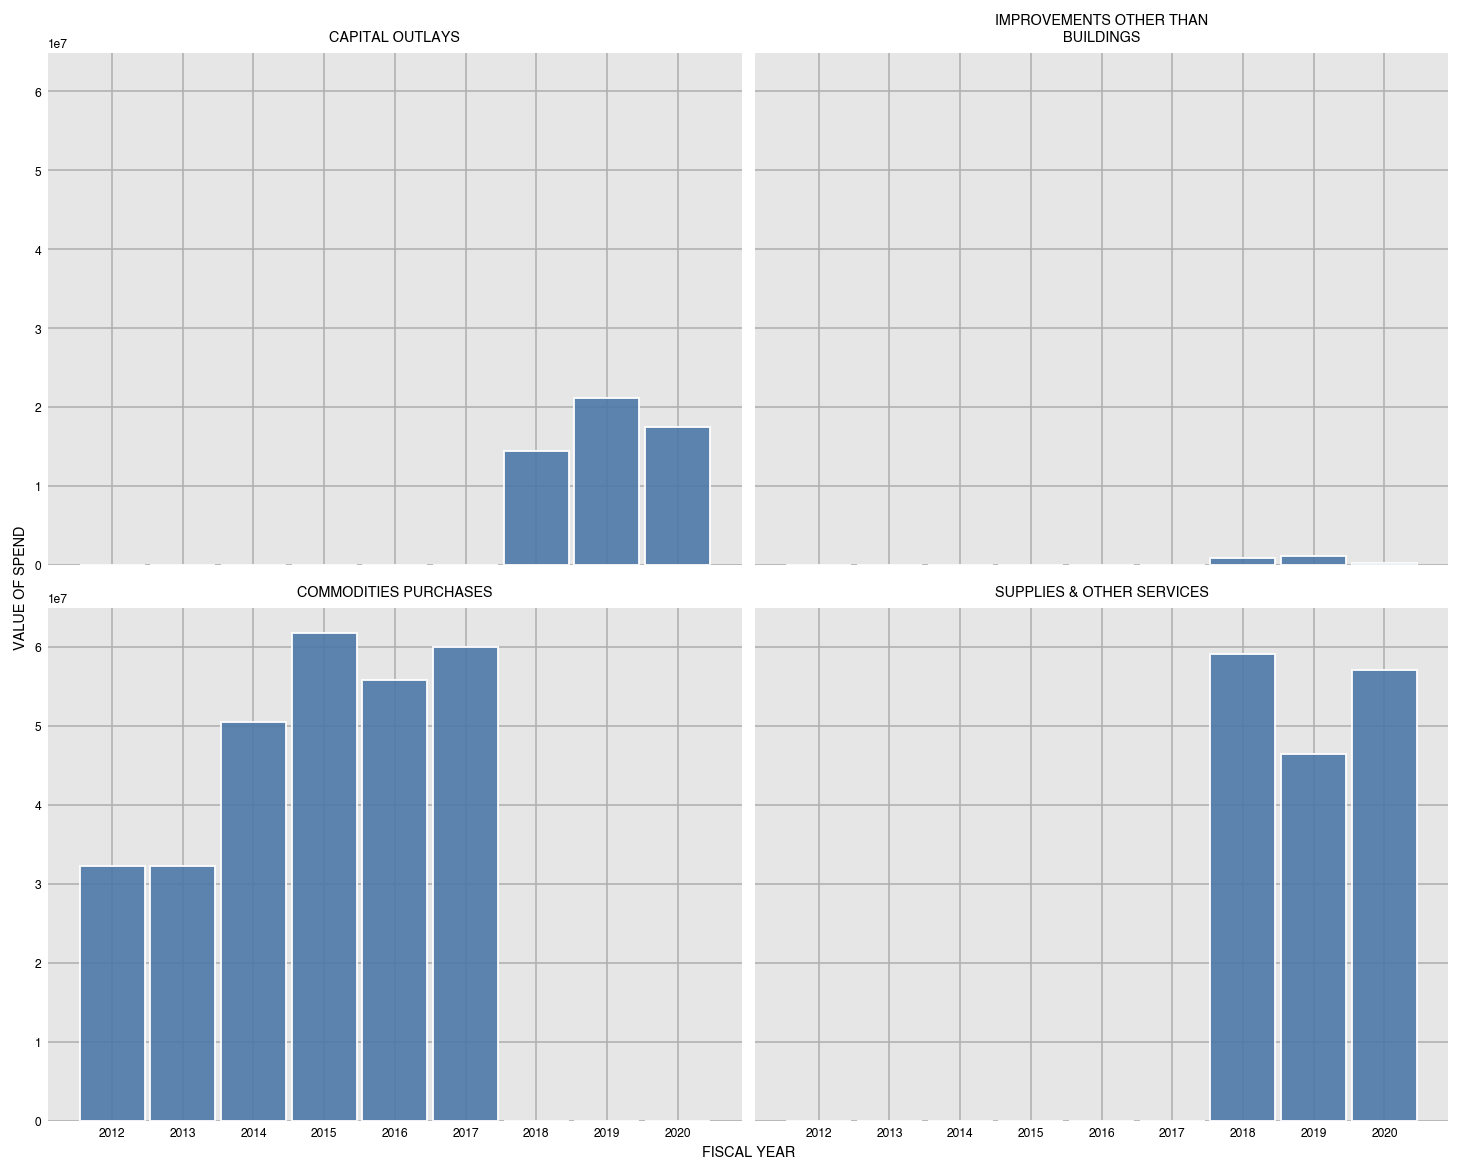

In [139]:
#filters for each group
dxp.bar(x='FISCAL YEAR', y='VALUE OF SPEND', data=expenses, aggfunc='sum',
        col='EXPENDITURE TYPE',figsize=(10,8),wrap=2) ##, x_order= 'top 5'

In [119]:
##filter on commodities & purchases 
com = expenses['EXPENDITURE TYPE'] == 'COMMODITIES PURCHASES'

Commodities and Purchases were the highest exepnse from 2012-2017 so I wanted to see what the top Account Names associated to those expenses were as seen below

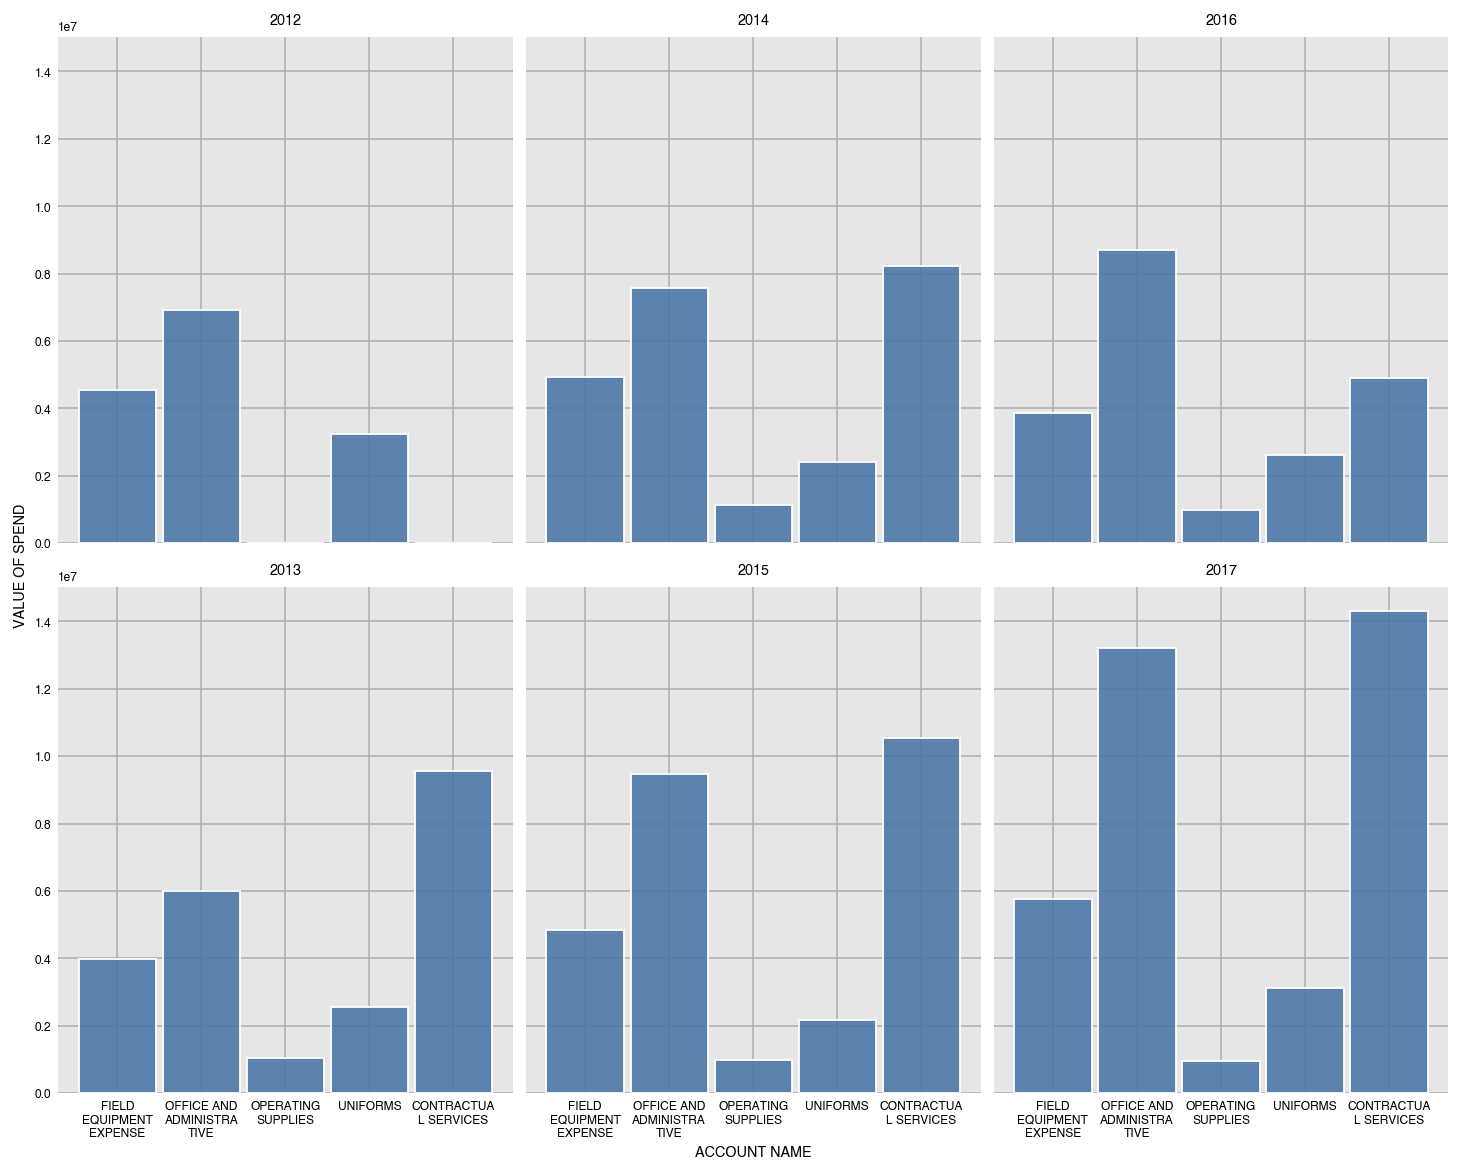

In [154]:
dxp.bar(x='ACCOUNT NAME', y='VALUE OF SPEND', data=expenses[com], aggfunc='sum',
        col='FISCAL YEAR',figsize=(10,8),wrap=3,x_order='top 5') ##, x_order= 'top 5'

In [156]:
##filter on commodities & purchases 
sup = expenses['EXPENDITURE TYPE'] == 'SUPPLIES & OTHER SERVICES'

Supplies & Other Services were the highest exepnse from 2018-2020 so I wanted to see what the top Account Names associated to those expenses were as seen below

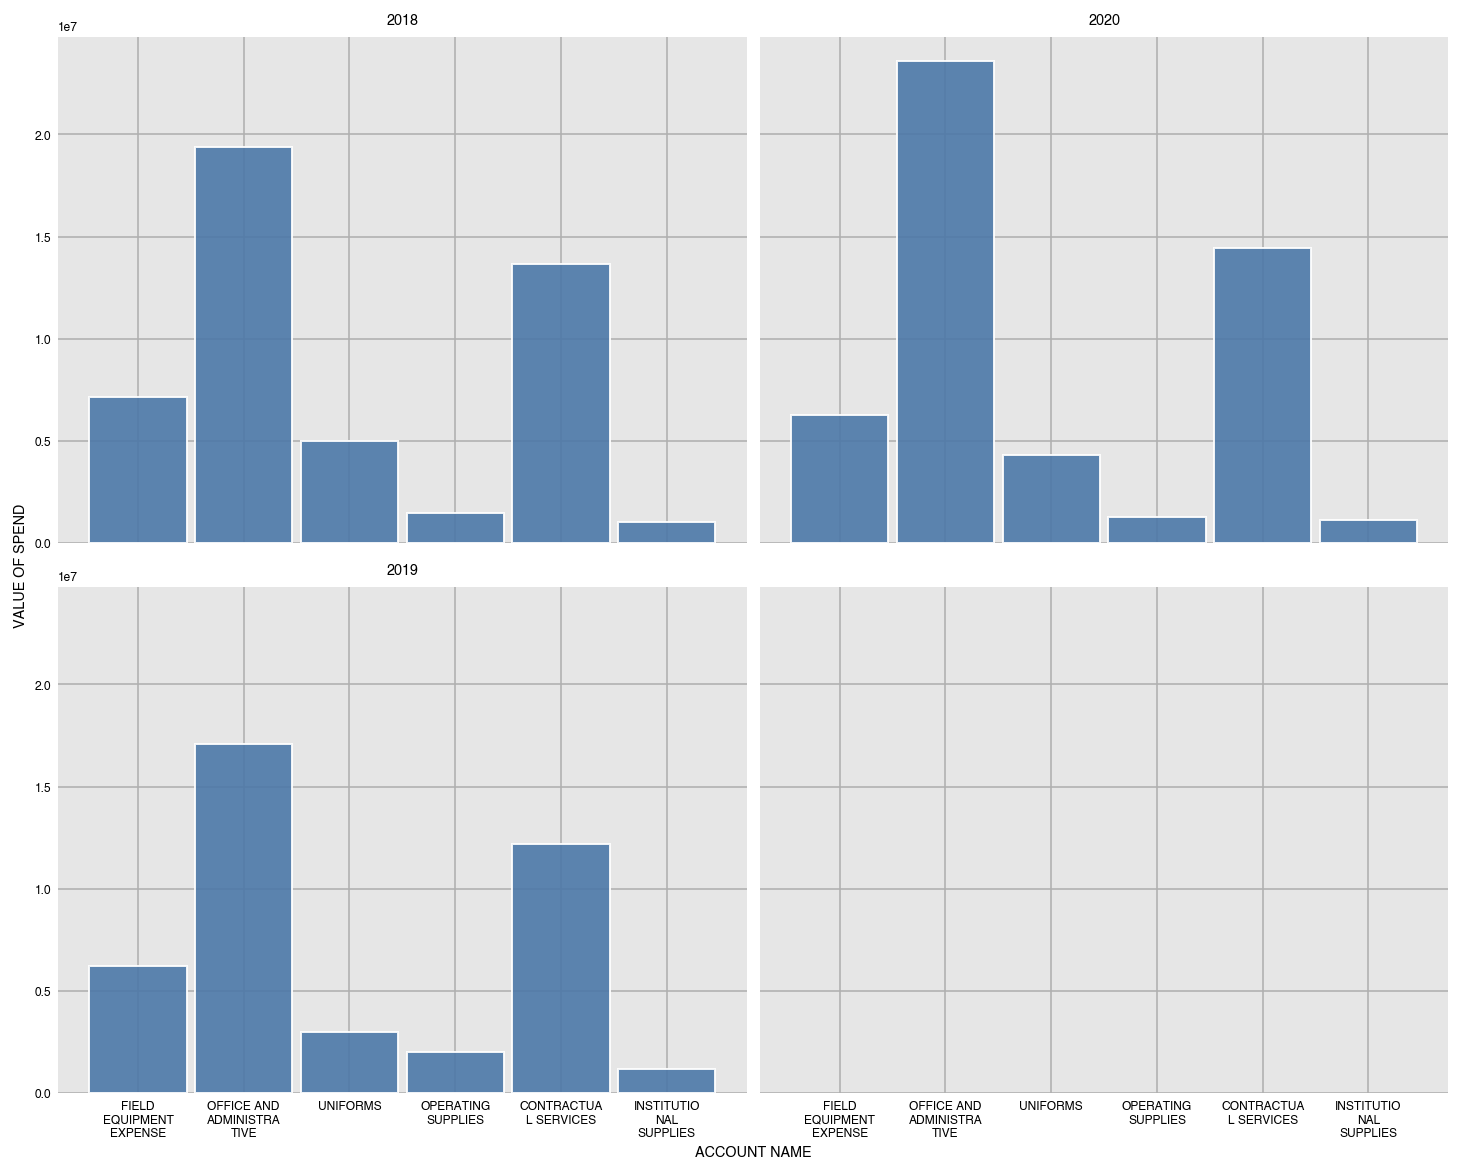

In [229]:
dxp.bar(x='ACCOUNT NAME', y='VALUE OF SPEND', data=expenses[sup], aggfunc='sum',
        col='FISCAL YEAR',figsize=(10,8),x_order='top 6',wrap=2) ##, x_order= 'top 5'

In [182]:
groupby = expenses[sup].groupby(by=['FISCAL YEAR','CALENDAR MONTH NUMBER','ACCOUNT NAME']).sum()

In [195]:
df1 = pd.DataFrame(groupby)##.query('FISCAL YEAR = 2018')

In [200]:
df1.reset_index(inplace=True)

In [218]:
year = df1['FISCAL YEAR'] == 2020

In [225]:
##['ACCOUNT NAME'].value_counts()
df1[year].sort_values('VALUE OF SPEND',ascending=False).head(10)

,FISCAL YEAR,CALENDAR MONTH NUMBER,ACCOUNT NAME,VALUE OF SPEND
510,2020,11,OFFICE AND ADMINISTRATIVE,5766103.22
496,2020,10,OFFICE AND ADMINISTRATIVE,4744466.85
505,2020,11,CONTRACTUAL SERVICES,3652432.52
411,2020,3,OFFICE AND ADMINISTRATIVE,3296416.24
491,2020,10,CONTRACTUAL SERVICES,3050179.86
453,2020,6,OFFICE AND ADMINISTRATIVE,2382859.14
519,2020,11,UNIFORMS,2082797.50
421,2020,4,CONTRACTUAL SERVICES,2068145.45
449,2020,6,CONTRACTUAL SERVICES,1988385.53
425,2020,4,OFFICE AND ADMINISTRATIVE,1698142.81


In [242]:
groupby2 = expenses.groupby(by=['FISCAL YEAR','VALUE OF SPEND']).sum()

In [243]:
df2 = pd.DataFrame(groupby2)
df2.reset_index(inplace=True)
df2.head()

,FISCAL YEAR,VALUE OF SPEND,CALENDAR MONTH NUMBER
0,2012,50.04,10
1,2012,50.06,12
2,2012,50.08,12
3,2012,50.10,8
4,2012,50.12,8


In [248]:
df2 = pd.DataFrame(df2.groupby('FISCAL YEAR').sum())
df2.reset_index(inplace=True)
df2.drop('CALENDAR MONTH NUMBER',axis=1,inplace=True)

In [294]:
df2.drop('CALENDAR MONTH NUMBER',axis=1,inplace=True)

In [297]:
df2.reset_index(inplace=True)

In [308]:
df2

,FISCAL YEAR,VALUE OF SPEND
0,2012,25471825.14
1,2013,25832825.73
2,2014,29839933.66
3,2015,35504885.13
4,2016,29646775.62
5,2017,42734499.40
6,2018,58554714.99
7,2019,48829778.48
8,2020,49222403.44


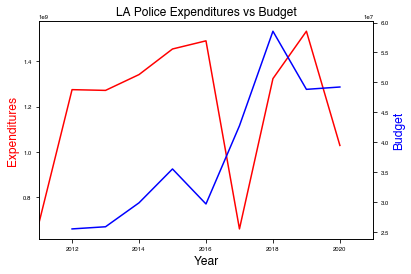

In [323]:
#LA Police Expenditures vs Budget
fig,ax = plt.subplots()
ax.plot(df4['FISCAL YEAR'], df4['EXPENDITURE'], color="red")
ax.set_xlabel("Year",fontsize=12)
ax.set_xlim(2011,2021)
ax.set_ylabel("Expenditures",color="red",fontsize=12)

ax2=ax.twinx()
ax2.plot(df2['FISCAL YEAR'], df2['VALUE OF SPEND'],color="blue")
ax2.set_ylabel('Budget',color="blue",fontsize=12)
plt.title('LA Police Expenditures vs Budget',{'fontsize':12})
plt.show()